In this challenge, we take five tables of data (one about users and four about whether each user reached each page of the site) and attempt to get a comprehensive picture of funnel conversion rate on the mobile site and on the pc site.  We also want to identify any page that the product team should focus on to improve conversion.
Hypothesis 1:
Users may leave site because they do not find what they are searching for
2:
Users may leave site at the payment page and not reach the confirmation page because the payment page is not working, or hard to enter information.
3: 
Users may leave site from the homepage because they cannot find or use the search function.

In [7]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
#Explore the data
#First check for missing data such as users who appear to skip required intermediate page steps.
userdata=pd.read_csv('/Users/mac/Documents/sample data science projects/Funnel/user_table.csv')
homedata=pd.read_csv('/Users/mac/Documents/sample data science projects/Funnel/home_page_table.csv')
searchdata=pd.read_csv('/Users/mac/Documents/sample data science projects/Funnel/search_page_table.csv')
paymentdata=pd.read_csv('/Users/mac/Documents/sample data science projects/Funnel/payment_page_table.csv')
confirmdata=pd.read_csv('/Users/mac/Documents/sample data science projects/Funnel/payment_confirmation_table.csv')
dfs=[homedata,searchdata,paymentdata,confirmdata]
data=userdata
print(homedata.shape)
print(userdata.shape)
for df in dfs:
    data=pd.merge(data,df,on='user_id',how='outer')
data.columns=['user_id','date','device','sex','home','search','payment','confirm']
print(data.head())
print(data.shape)

(90400, 2)
(90400, 4)
   user_id        date   device     sex       home       search payment  \
0   450007  2015-02-28  Desktop  Female  home_page          NaN     NaN   
1   756838  2015-01-13  Desktop    Male  home_page          NaN     NaN   
2   568983  2015-04-09  Desktop    Male  home_page  search_page     NaN   
3   190794  2015-02-18  Desktop  Female  home_page  search_page     NaN   
4   537909  2015-01-15  Desktop    Male  home_page          NaN     NaN   

  confirm  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
(90400, 8)


In [8]:
#Clean data
data['home']=pd.get_dummies(data['home'])
data['search']=pd.get_dummies(data['search'])
data['payment']=pd.get_dummies(data['payment'])
data['confirm']=pd.get_dummies(data['confirm'])
print(data.head())

   user_id        date   device     sex  home  search  payment  confirm
0   450007  2015-02-28  Desktop  Female     1       0        0        0
1   756838  2015-01-13  Desktop    Male     1       0        0        0
2   568983  2015-04-09  Desktop    Male     1       1        0        0
3   190794  2015-02-18  Desktop  Female     1       1        0        0
4   537909  2015-01-15  Desktop    Male     1       0        0        0


In [39]:
#Check that data is recorded correctly
for index,row in data.iterrows():
    if row[5]>row[4]: print('error')
    if row[6]>row[5]: print('error')
    if row[7]>row[6]: print('error')

              home  search  payment  confirm
date                                        
2015-01-04  2906.0  1752.0    300.0       25
2015-01-11  5087.0  3021.0    506.0       47
2015-01-18  5037.0  3050.0    523.0       35
2015-01-25  5221.0  3088.0    596.0       49
2015-02-01  5177.0  3162.0    558.0       40


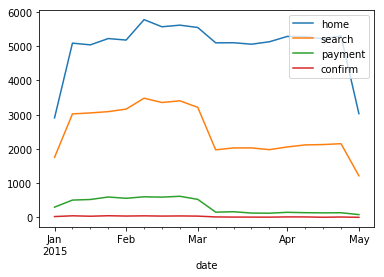

In [27]:
#Plot trends against time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Groupby date
data['date']=pd.to_datetime(data['date'])
data_weeks=data.groupby(pd.Grouper(key='date', freq='W-SUN')).agg({'home':'sum','search':'sum','payment':'sum','confirm':'sum'})
data.reset_index()
print(data_weeks.head())
ax = data_weeks.plot()
plt.show()

user_id    498709.683473
home            1.000000
search          0.500000
payment         0.066704
confirm         0.005000
dtype: float64
desktop
user_id    498484.582492
home            1.000000
search          0.500000
payment         0.050000
confirm         0.002492
dtype: float64


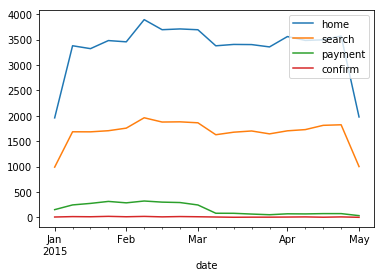

Mobile
user_id    499158.394702
home            1.000000
search          0.500000
payment         0.100000
confirm         0.010000
dtype: float64


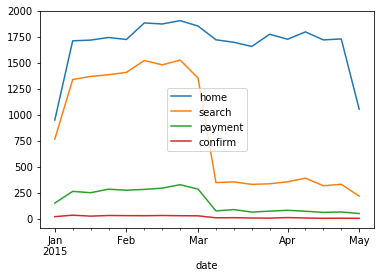

Male and desktop
user_id    499850.526107
home            1.000000
search          0.496937
payment         0.049002
confirm         0.002516
dtype: float64


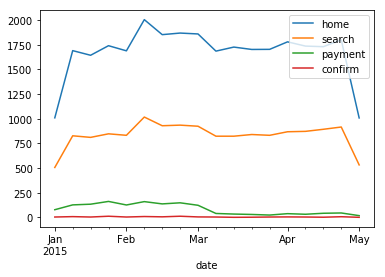

Male and mobile
user_id    497284.079884
home            1.000000
search          0.496958
payment         0.095887
confirm         0.008927
dtype: float64


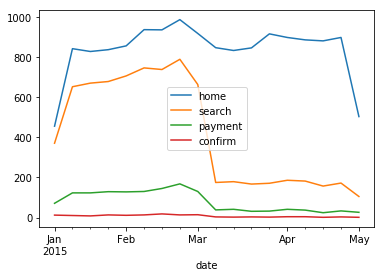

Female and desktop
user_id    497109.258459
home            1.000000
search          0.503084
payment         0.051005
confirm         0.002467
dtype: float64


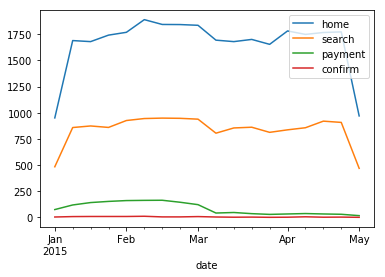

Female and mobile
user_id    501038.179069
home            1.000000
search          0.503051
payment         0.104125
confirm         0.011076
dtype: float64


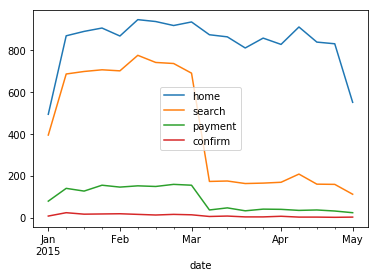

In [30]:
#Check trends by desktop/mobile and male/female
print(data.mean())
print('desktop')
print(data[data['device']=='Desktop'].mean())
data_weeks=data[data['device']=='Desktop'].groupby(pd.Grouper(key='date', freq='W-SUN')).agg({'home':'sum','search':'sum','payment':'sum','confirm':'sum'})

ax = data_weeks.plot()
plt.show()
print('Mobile')
print(data[data['device']=='Mobile'].mean())
data_weeks=data[data['device']=='Mobile'].groupby(pd.Grouper(key='date', freq='W-SUN')).agg({'home':'sum','search':'sum','payment':'sum','confirm':'sum'})

ax = data_weeks.plot()
plt.show()
print('Male and desktop')
print(data[(data['device']=='Desktop') & (data['sex']=='Male')].mean())
data_weeks=data[(data['device']=='Desktop') & (data['sex']=='Male')].groupby(pd.Grouper(key='date', freq='W-SUN')).agg({'home':'sum','search':'sum','payment':'sum','confirm':'sum'})

ax = data_weeks.plot()
plt.show()
print('Male and mobile')
print(data[(data['device']=='Mobile') & (data['sex']=='Male')].mean())
data_weeks=data[(data['device']=='Mobile') & (data['sex']=='Male')].groupby(pd.Grouper(key='date', freq='W-SUN')).agg({'home':'sum','search':'sum','payment':'sum','confirm':'sum'})

ax = data_weeks.plot()
plt.show()
print('Female and desktop')
print(data[(data['device']=='Desktop') & (data['sex']=='Female')].mean())
data_weeks=data[(data['device']=='Desktop') & (data['sex']=='Female')].groupby(pd.Grouper(key='date', freq='W-SUN')).agg({'home':'sum','search':'sum','payment':'sum','confirm':'sum'})

ax = data_weeks.plot()
plt.show()
print('Female and mobile')
print(data[(data['device']=='Mobile') & (data['sex']=='Female')].mean())
data_weeks=data[(data['device']=='Mobile') & (data['sex']=='Female')].groupby(pd.Grouper(key='date', freq='W-SUN')).agg({'home':'sum','search':'sum','payment':'sum','confirm':'sum'})

ax = data_weeks.plot()
plt.show()

Observations:
1. In general, about half of users leave without reaching the search page and one-tenth of users move from the search to payment page, and one tenth from payment to confirm.
2. Twice as many mobile users move to the payment page and four times as many mobile users move to the confirm page as desktop users.
3. Women are more likely to reach the payment page on desktop but less likely than men to reach the confirm page.
4. Women are more likely to reach all pages than men on mobile.
5. There was a huge drop in users passing beyond home page on mobile, around the beginning of March.

The company should look at the desktop version of the site, especially at the search page generally to make improvements so that more people click through to the payment page. (Hypothesis 1)  The company should also try to find out why women are leaving the desktop site at the payment page. (Hypothesis 2)

The company should also check any changes that happened to the homepage on the mobile version of the site around March to get more people searching again on mobile. (Hypothesis 3)